# Encontrando puntos alineados

## Codificación

En esta ocasión utilizaremos la librería *pyplot* de *matplotlib* para realizar las gráficas donde visualizaremos los puntos que generaremos y las rectas que encontremos. Para generar puntos aleatorios utilizaremos la librería *numpy*.


In [180]:
from matplotlib import pyplot as plt
import numpy as np

### Sorteando los puntos

Generamos una lista con todas las coordenadas X de los puntos y otra para las coordenadas Y. 

Opcionalmente, creamos una lista de valores para asignar un color a cada punto. En este caso utilizaremos la suma de coordenadas para más adelante mapear estos valores con los colores codificados en modo HSV. De esta forma obtenemos un efecto "arcoiris".

In [181]:
n_points = 50  # Number of points

# Creating a random set of points
x_values = [np.random.randint(100) for i in range(n_points)]
y_values = [np.random.randint(100) for i in range(n_points)]
colors = [x_values[i] + y_values[i] for i in range(n_points)]

Visualizamos los puntos para comprobar que se han creado correctamente.

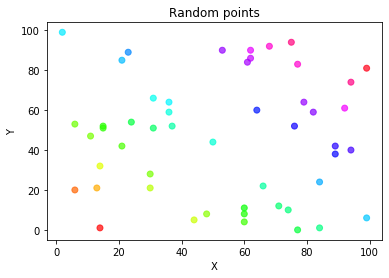

In [182]:
# Plot
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random points')
_ = plt.scatter(x_values, y_values, c=colors, cmap='hsv', alpha=0.7)
plt.show()

## Método 1: Área del triángulo

In [183]:
def colinear_1(x_values, y_values):
    size = len(x_values)
    x_segments = []
    y_segments = []
    for i in range(size):
        x1, y1 = x_values[i], y_values[i]
        for j in range(size):
            if i == j:
                continue
            x2, y2 = x_values[j], y_values[j]
            for k in range(size):
                if i == k or j == k:
                    continue
                x3, y3 = x_values[k], y_values[k]
                if x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2) == 0:
                    x_segments += [x1, x2, x1, x3]
                    y_segments += [y1, y2, y1, y3]
    return x_segments, y_segments

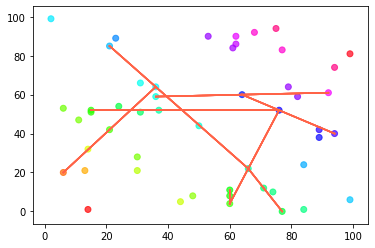

In [184]:
x, y = colinear_1(x_values, y_values)

# Showing the results
for i in range(0, len(x), 2):
    _ = plt.plot(x[i:i + 2], y[i:i + 2], c='Tomato', alpha=0.7)
_ = plt.scatter(x_values, y_values, c=colors, cmap='hsv', alpha=0.7)
plt.show()